In [1]:
# Importing Basic Libraries

import pandas as pd                # For Dataset Manipulatuon
import numpy as np                 # For Matrix Manipulation
import matplotlib.pyplot as plt    # For Data Visualisation 
import seaborn as sns              # For Data Visualisation  
import warnings                    # For Ignoring Warnings 
warnings.filterwarnings('ignore')
from scipy.stats import mode

# Data Preprocessing Libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder

# ML Libraries

from ClassificationModel import ClassificationModels as models
from sklearn import tree

# Evaluation Metrics

from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Importing Train and Test Datasets

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.shape, test.shape

((614, 13), (367, 12))

In [3]:
train.head()     # Train Dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()     # Test Datset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001924,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614,NaN,NaN,NaN,5403.46,6109.04,150,2877.5,3812.5,5795,81000
CoapplicantIncome,614,NaN,NaN,NaN,1621.25,2926.25,0,0,1188.5,2297.25,41667
LoanAmount,592,NaN,NaN,NaN,146.412,85.5873,9,100,128,168,700
Loan_Amount_Term,600,NaN,NaN,NaN,342,65.1204,12,360,360,360,480


In [6]:
train.isnull().sum()     # Checking for Nan Values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
test.isnull().sum()     # Checking for Nan Values

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

## Single Varable Data Ananlysis

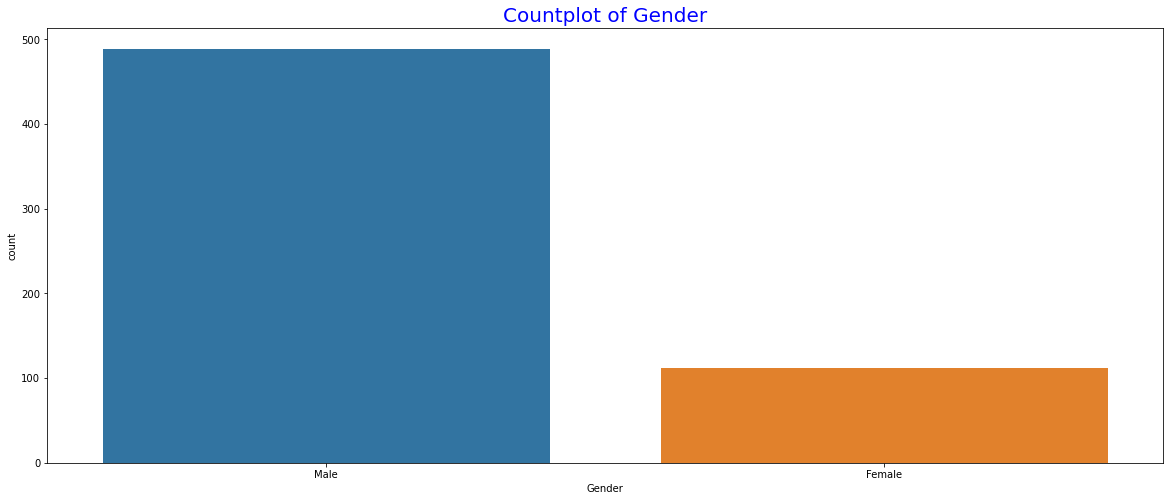

In [8]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'Gender', data = train)
plt.title('Countplot of Gender', loc = 'center', fontdict = {'color' : 'blue',
                                                             'fontsize' : 20})
plt.show()

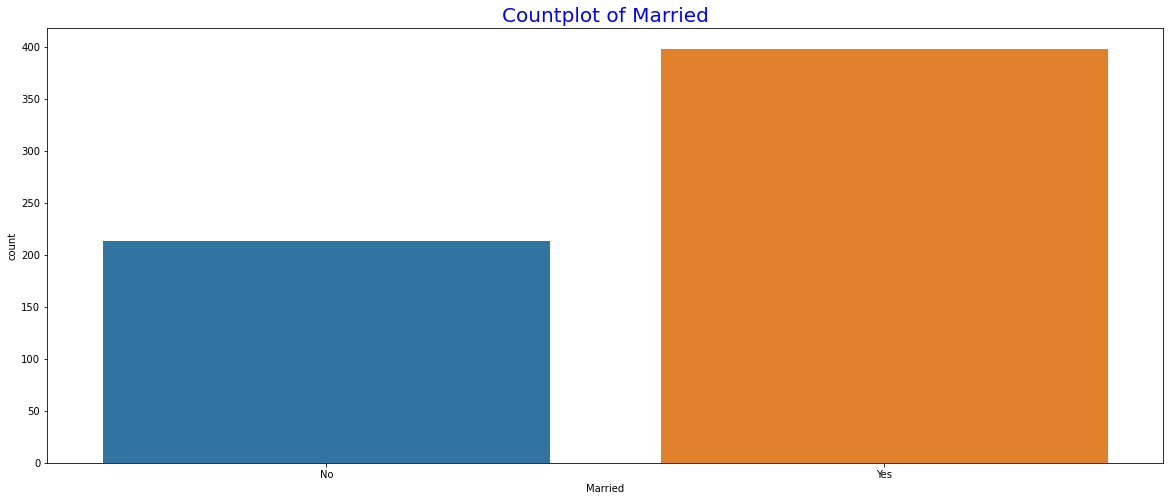

In [9]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'Married', data = train)
plt.title('Countplot of Married', loc = 'center', fontdict = {'color' : 'blue',
                                                              'fontsize' : 20})
plt.show()

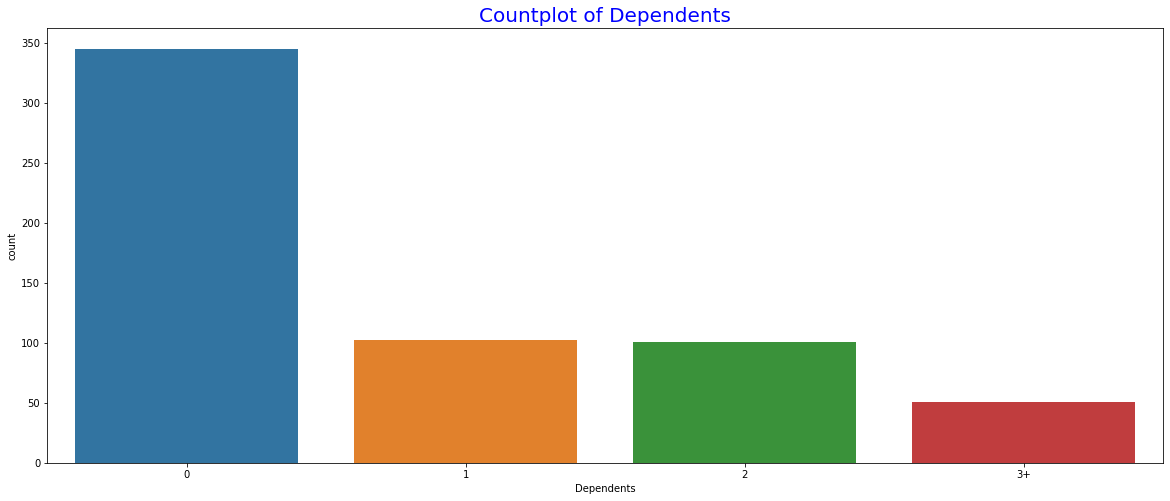

In [10]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'Dependents', data = train)
plt.title('Countplot of Dependents', loc = 'center', fontdict = {'color' : 'blue',
                                                                 'fontsize' : 20})
plt.show()

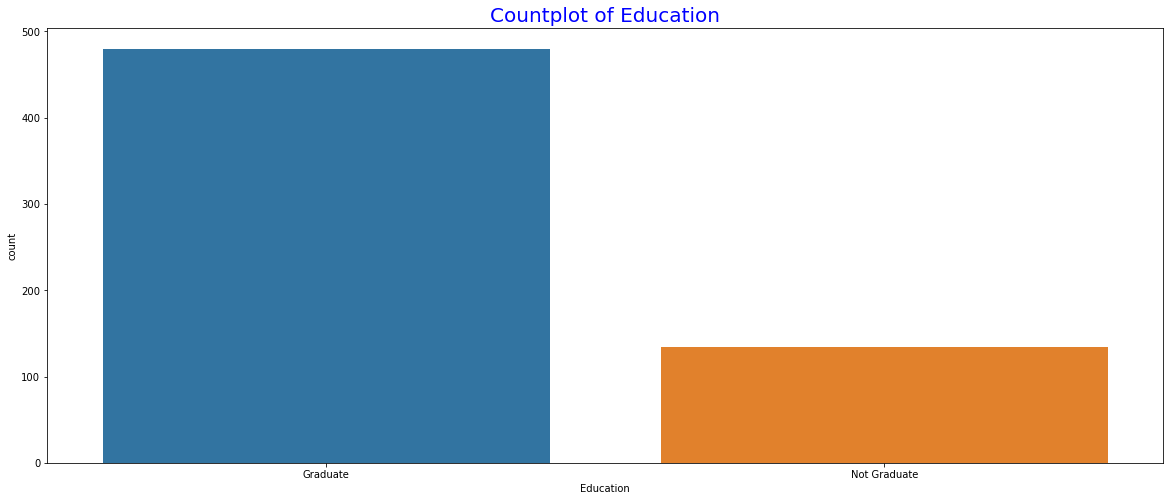

In [11]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'Education', data = train)
plt.title('Countplot of Education', loc = 'center', fontdict = {'color' : 'blue',
                                                                'fontsize' : 20})
plt.show()

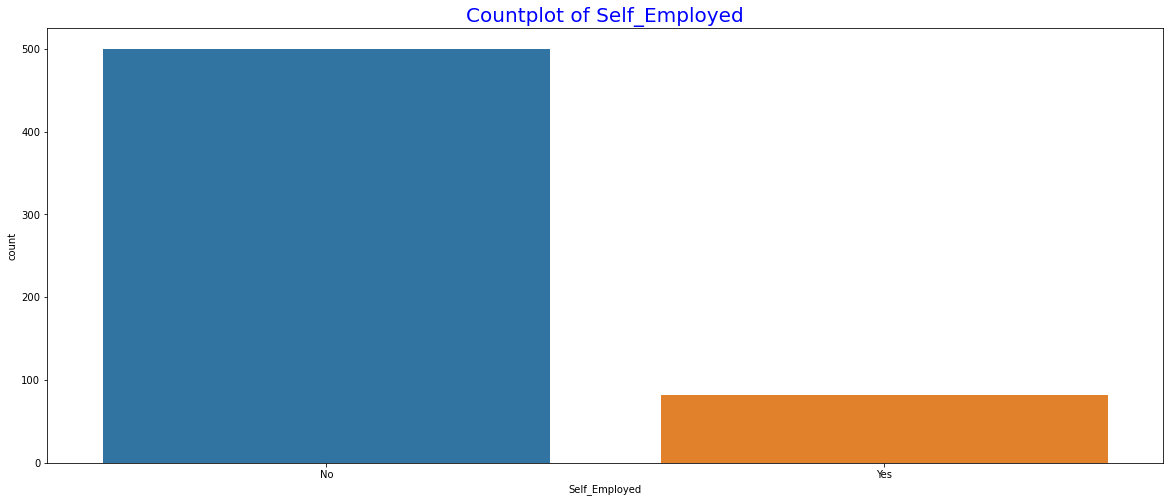

In [12]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'Self_Employed', data = train)
plt.title('Countplot of Self_Employed', loc = 'center', fontdict = {'color' : 'blue',
                                                                    'fontsize' : 20})
plt.show()

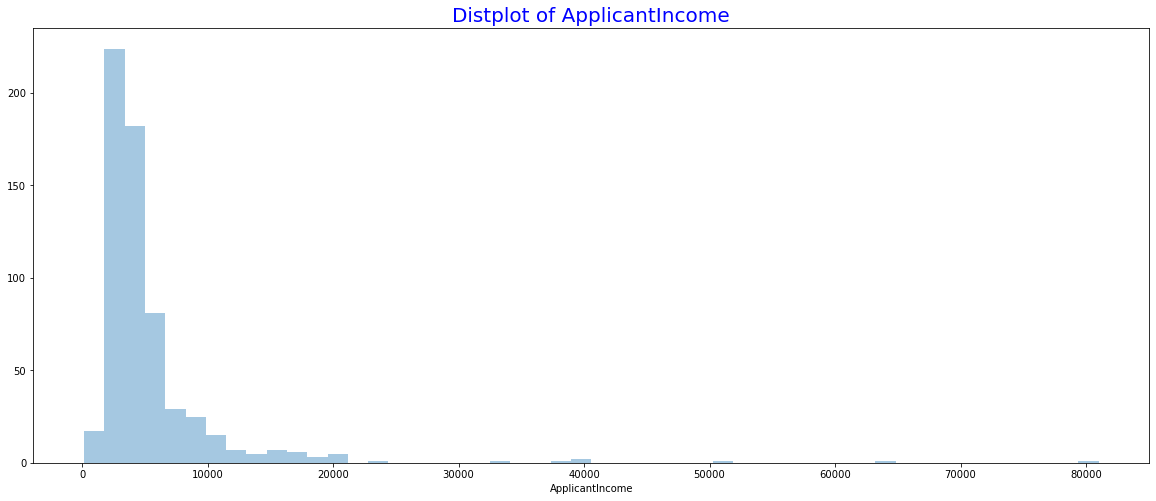

In [13]:
plt.figure(figsize = (20, 8))
sns.distplot(train['ApplicantIncome'], kde = False)
plt.title('Distplot of ApplicantIncome', loc = 'center', fontdict = {'color' : 'blue',
                                                                     'fontsize' : 20})
plt.show()

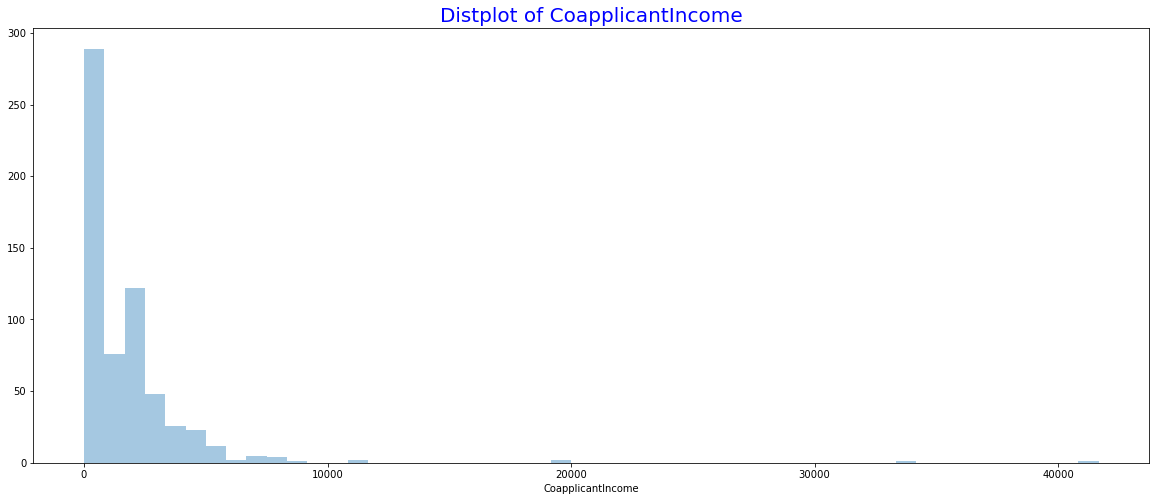

In [14]:
plt.figure(figsize = (20, 8))
sns.distplot(train['CoapplicantIncome'], kde = False)
plt.title('Distplot of CoapplicantIncome', loc = 'center', fontdict = {'color' : 'blue',
                                                                       'fontsize' : 20})
plt.show()

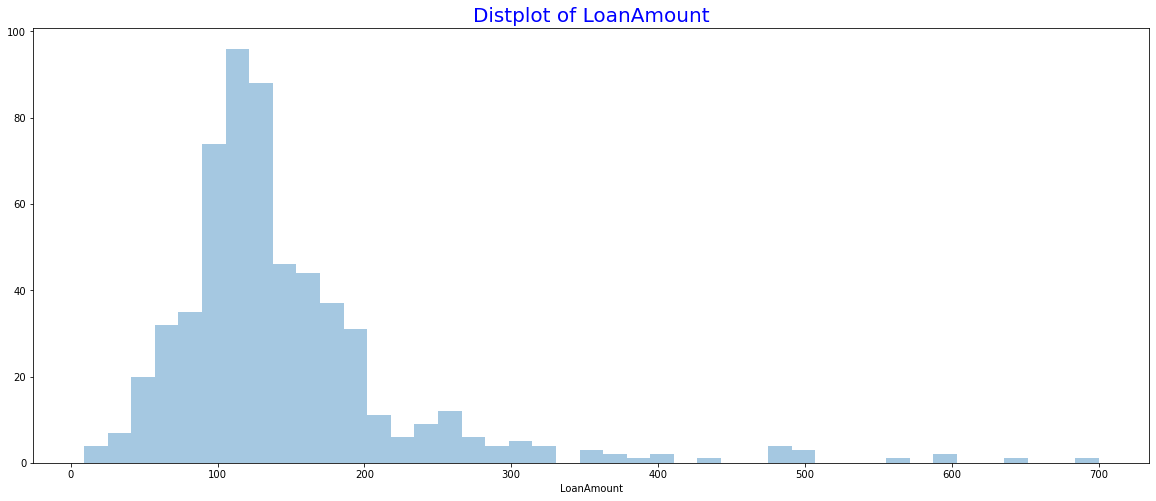

In [15]:
plt.figure(figsize = (20, 8))
sns.distplot(train['LoanAmount'], kde = False)
plt.title('Distplot of LoanAmount', loc = 'center', fontdict = {'color' : 'blue',
                                                                'fontsize' : 20})
plt.show()

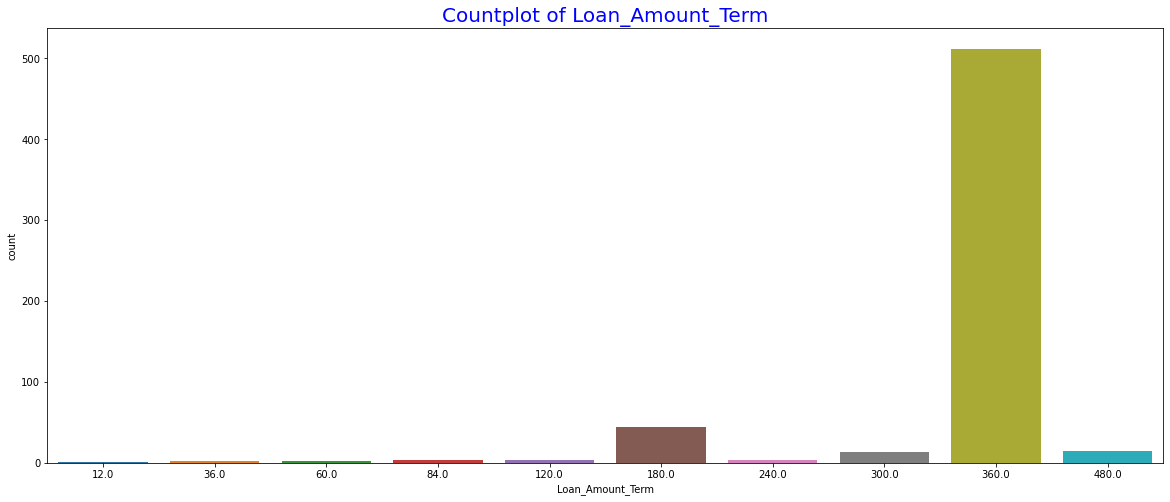

In [16]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'Loan_Amount_Term', data = train)
plt.title('Countplot of Loan_Amount_Term', loc = 'center', fontdict = {'color' : 'blue',
                                                                       'fontsize' : 20})
plt.show()

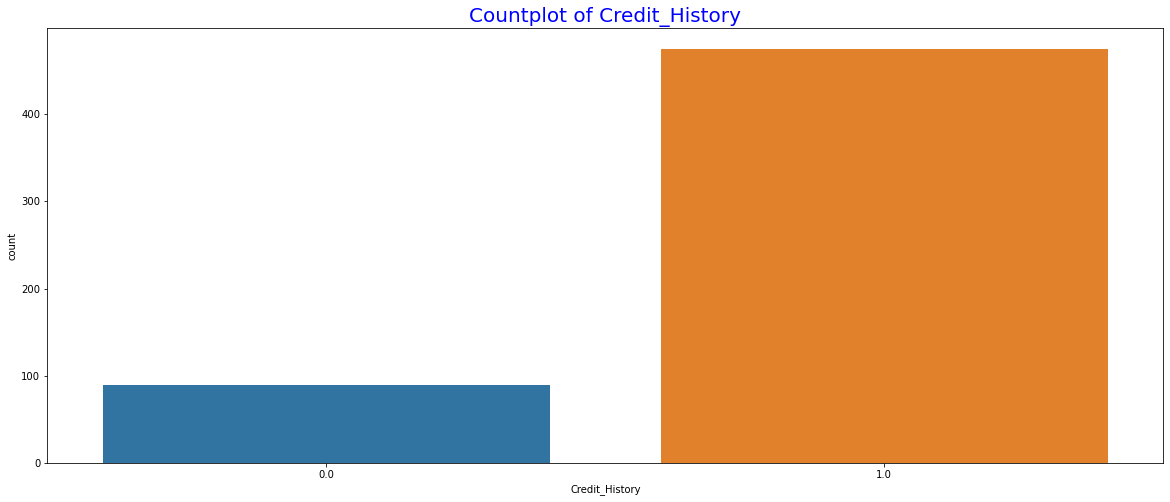

In [17]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'Credit_History', data = train)
plt.title('Countplot of Credit_History', loc = 'center', fontdict = {'color' : 'blue',
                                                                     'fontsize' : 20})
plt.show()

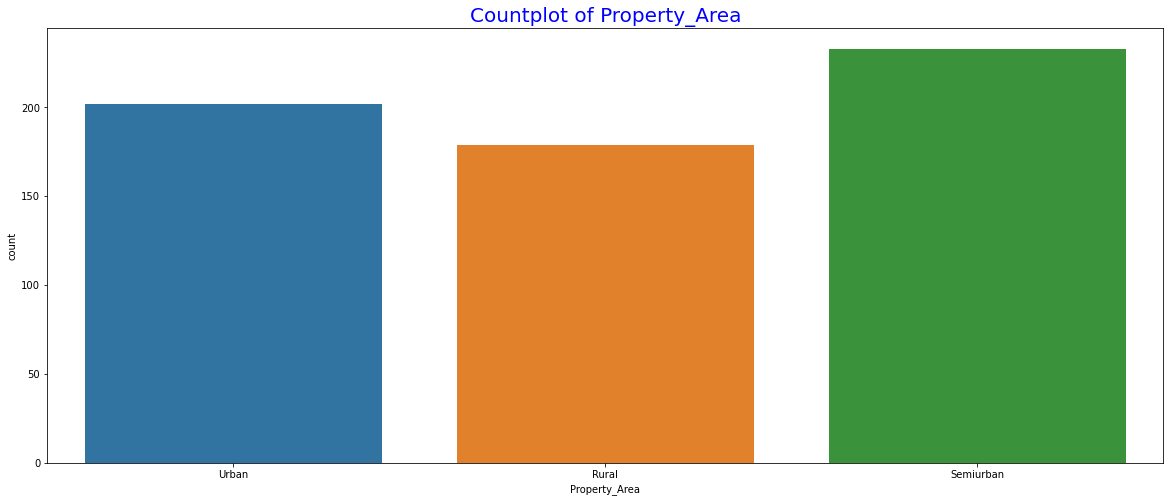

In [18]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'Property_Area', data = train)
plt.title('Countplot of Property_Area', loc = 'center', fontdict = {'color' : 'blue',
                                                                    'fontsize' : 20})
plt.show()

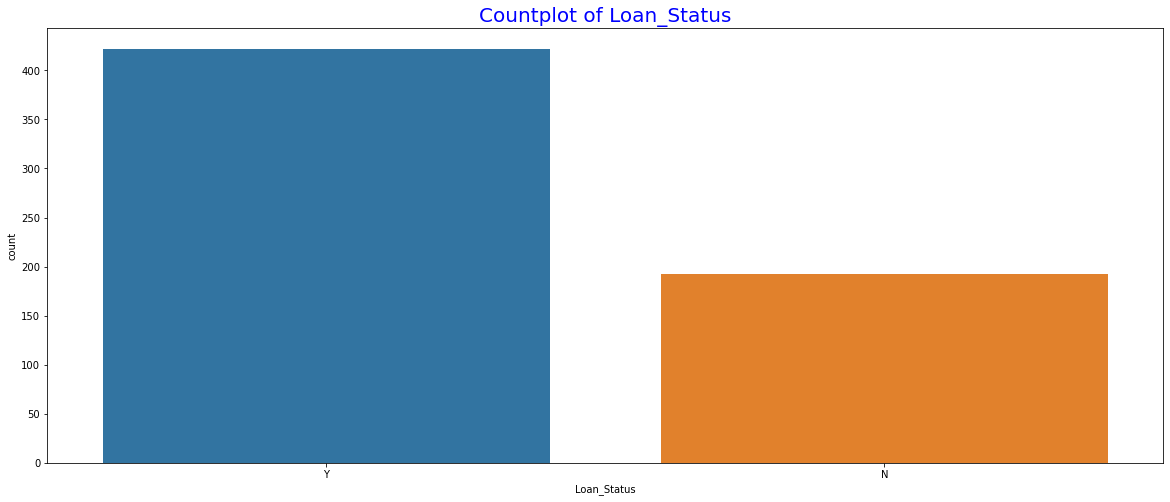

In [19]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'Loan_Status', data = train)
plt.title('Countplot of Loan_Status', loc = 'center', fontdict = {'color' : 'blue',
                                                                  'fontsize' : 20})
plt.show()

## Multivariable Data Analysis

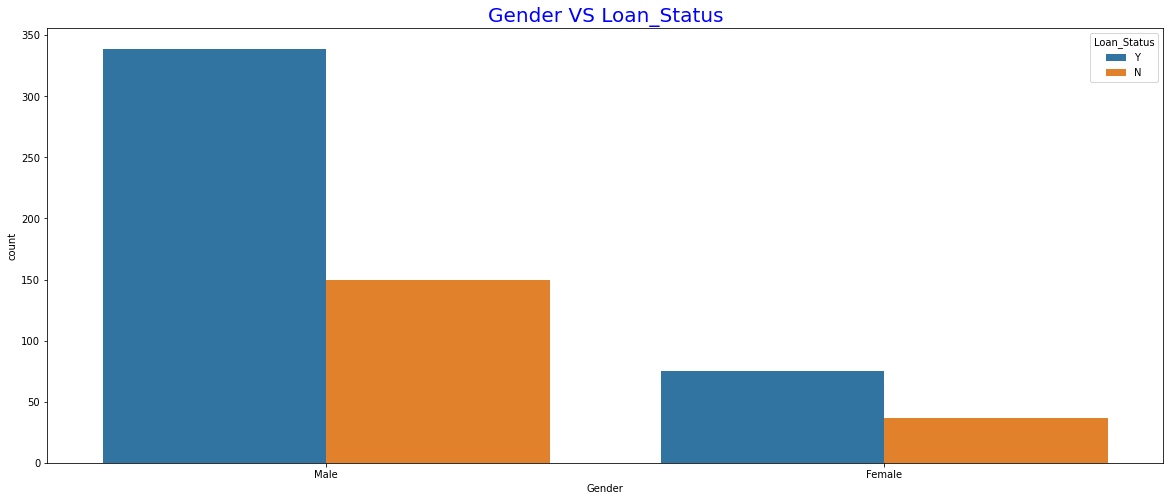

In [20]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'Gender', data = train, hue = 'Loan_Status')
plt.title('Gender VS Loan_Status', loc = 'center', fontdict = {'color' : 'blue',
                                                               'fontsize' : 20})
plt.show()

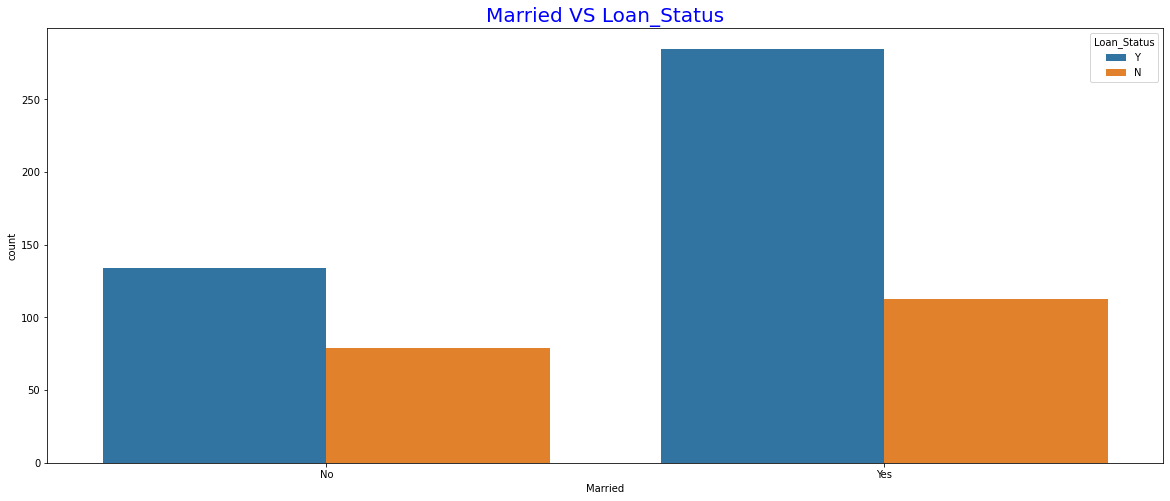

In [21]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'Married', data = train, hue = 'Loan_Status')
plt.title('Married VS Loan_Status', loc = 'center', fontdict = {'color' : 'blue',
                                                                'fontsize' : 20})
plt.show()

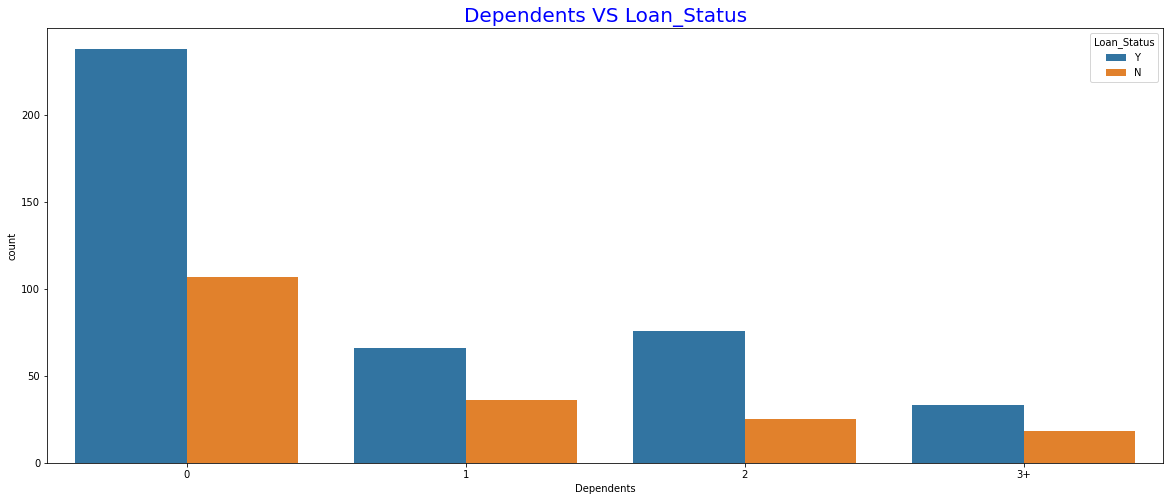

In [22]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'Dependents', data = train, hue = 'Loan_Status')
plt.title('Dependents VS Loan_Status', loc = 'center', fontdict = {'color' : 'blue',
                                                                   'fontsize' : 20})
plt.show()

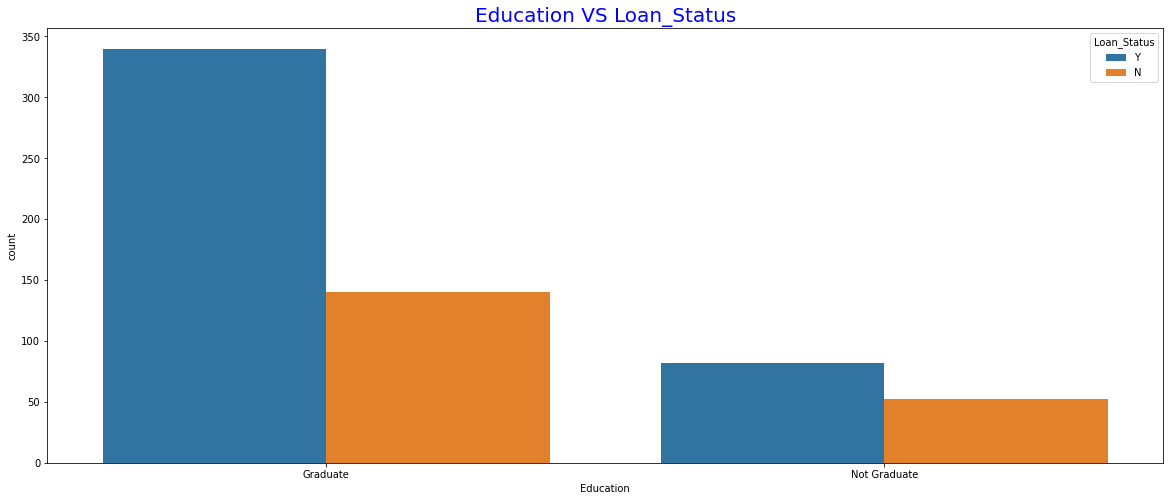

In [23]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'Education', data = train, hue = 'Loan_Status')
plt.title('Education VS Loan_Status', loc = 'center', fontdict = {'color' : 'blue',
                                                                  'fontsize' : 20})
plt.show()

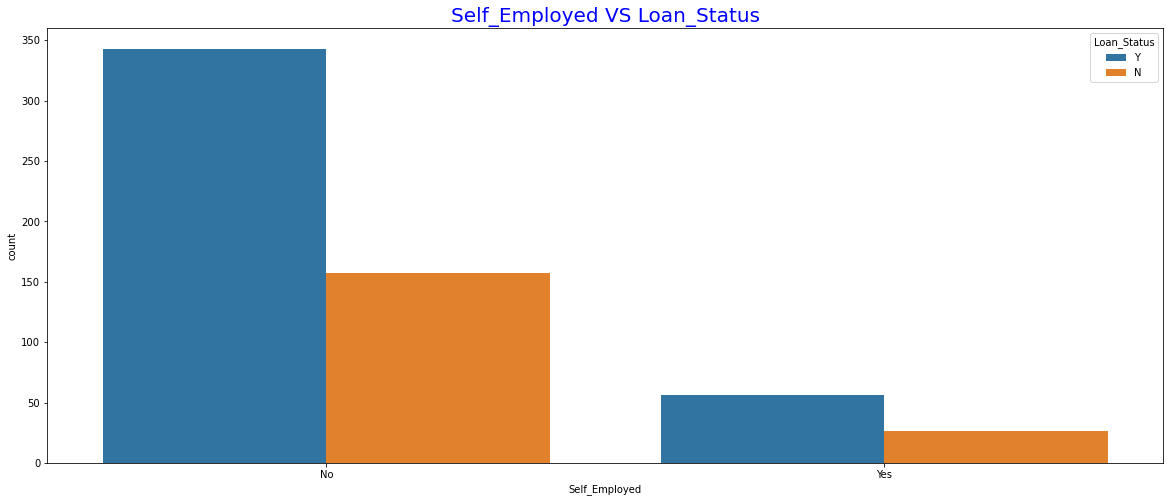

In [24]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'Self_Employed', data = train, hue = 'Loan_Status')
plt.title('Self_Employed VS Loan_Status', loc = 'center', fontdict = {'color' : 'blue',
                                                                      'fontsize' : 20})
plt.show()

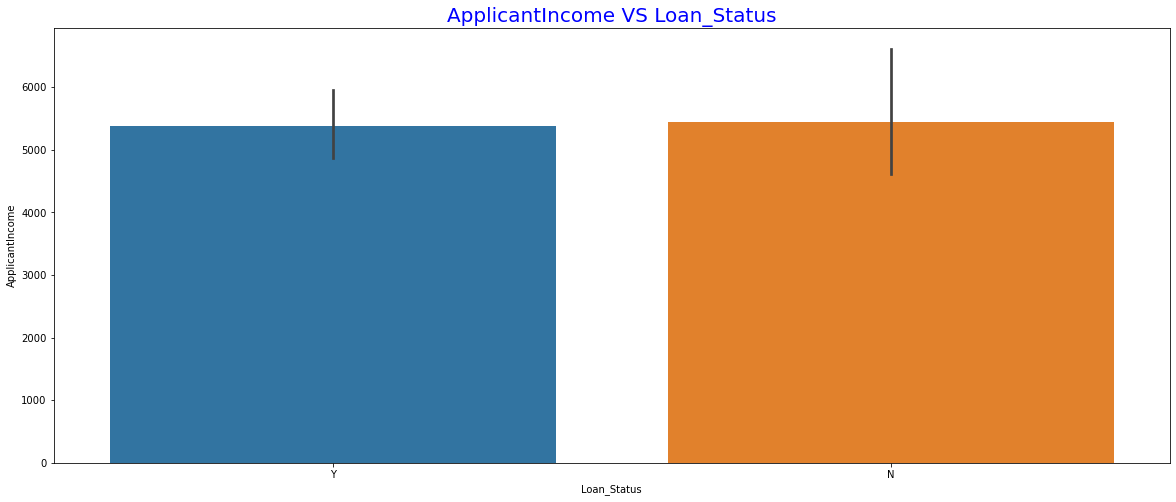

In [25]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'Loan_Status', y = 'ApplicantIncome',data = train)
plt.title('ApplicantIncome VS Loan_Status', loc = 'center', fontdict = {'color' : 'blue',
                                                                        'fontsize' : 20})
plt.show()

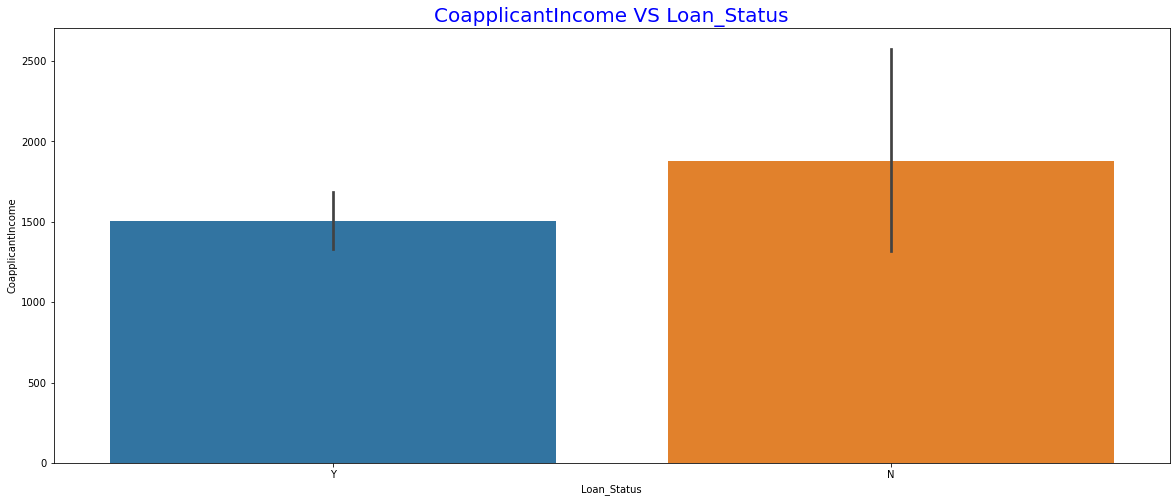

In [26]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'Loan_Status', y = 'CoapplicantIncome',data = train)
plt.title('CoapplicantIncome VS Loan_Status', loc = 'center', fontdict = {'color' : 'blue',
                                                                        'fontsize' : 20})
plt.show()

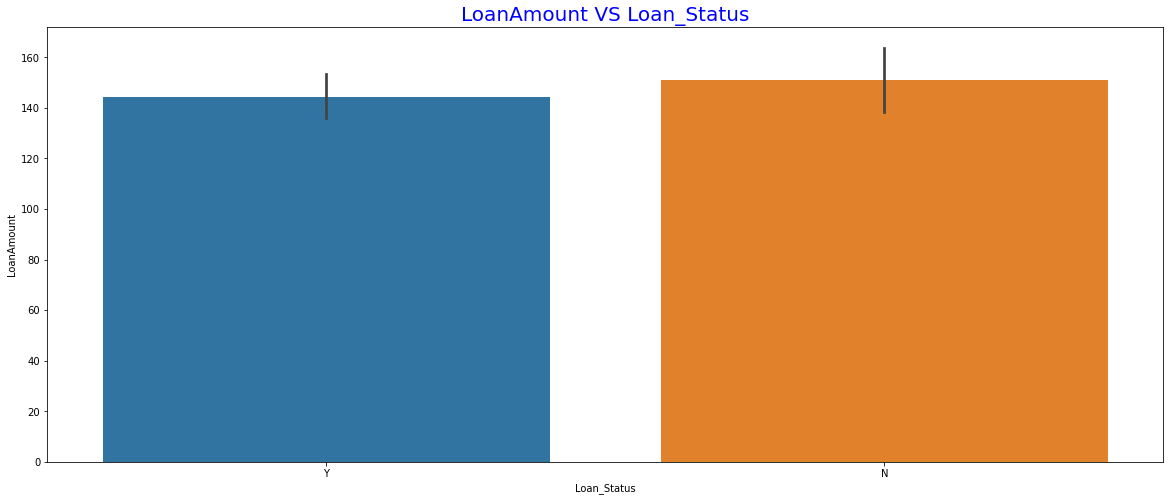

In [27]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'Loan_Status', y = 'LoanAmount',data = train)
plt.title('LoanAmount VS Loan_Status', loc = 'center', fontdict = {'color' : 'blue',
                                                                   'fontsize' : 20})
plt.show()

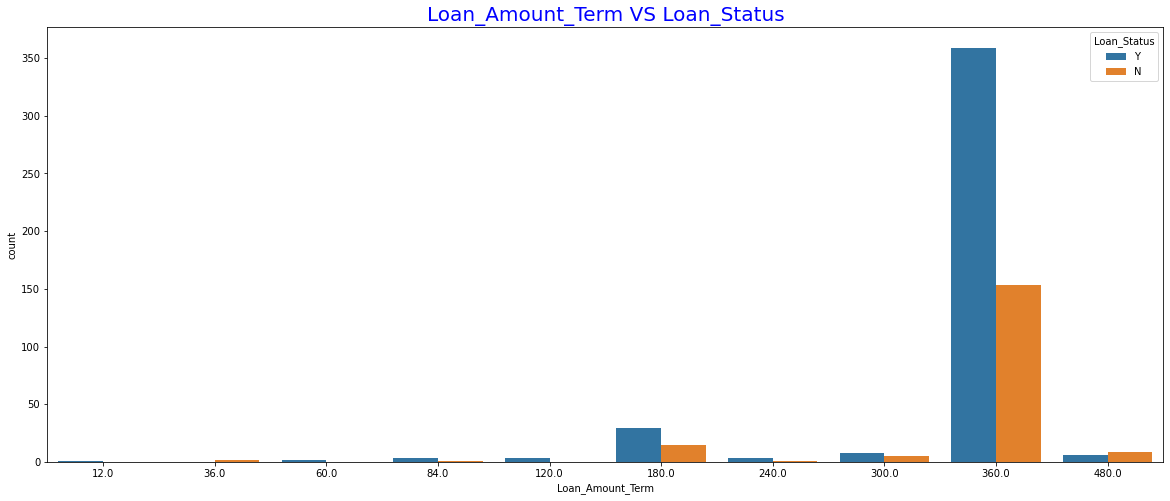

In [28]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'Loan_Amount_Term', data = train, hue = 'Loan_Status')
plt.title('Loan_Amount_Term VS Loan_Status', loc = 'center', fontdict = {'color' : 'blue',
                                                                         'fontsize' : 20})
plt.show()

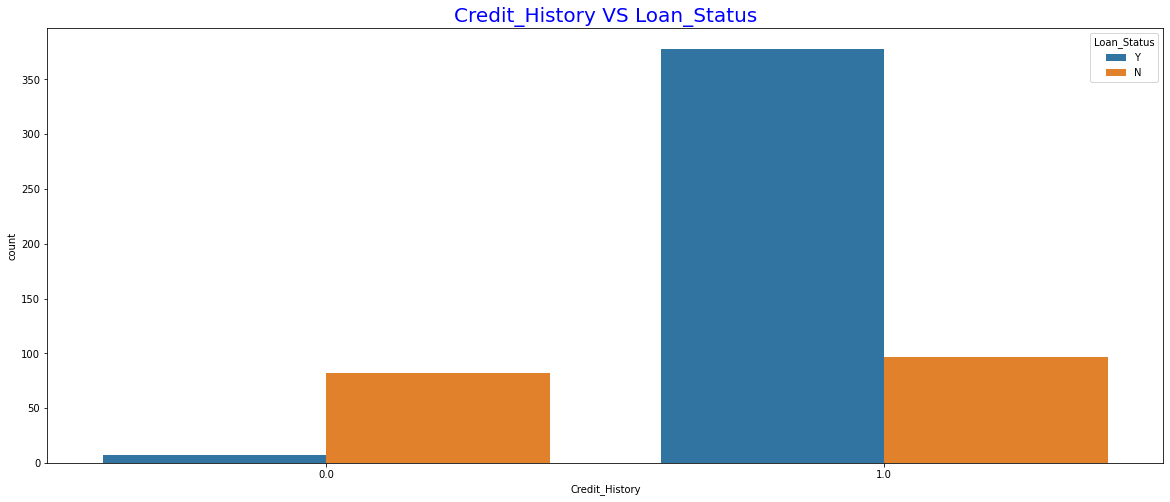

In [29]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'Credit_History', data = train, hue = 'Loan_Status')
plt.title('Credit_History VS Loan_Status', loc = 'center', fontdict = {'color' : 'blue',
                                                                       'fontsize' : 20})
plt.show()

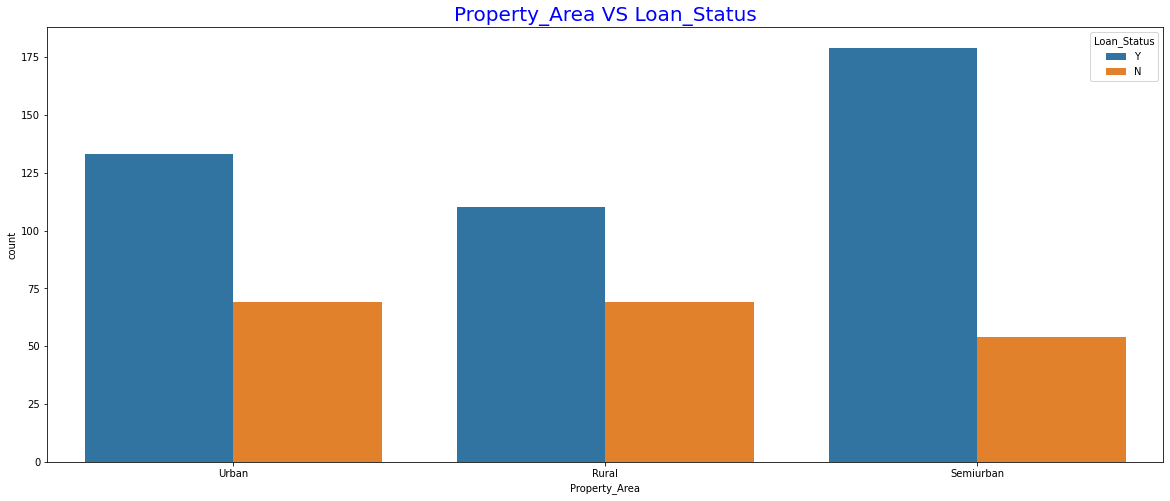

In [30]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'Property_Area', data = train, hue = 'Loan_Status')
plt.title('Property_Area VS Loan_Status', loc = 'center', fontdict = {'color' : 'blue',
                                                                      'fontsize' : 20})
plt.show()

## Checking for Outliers

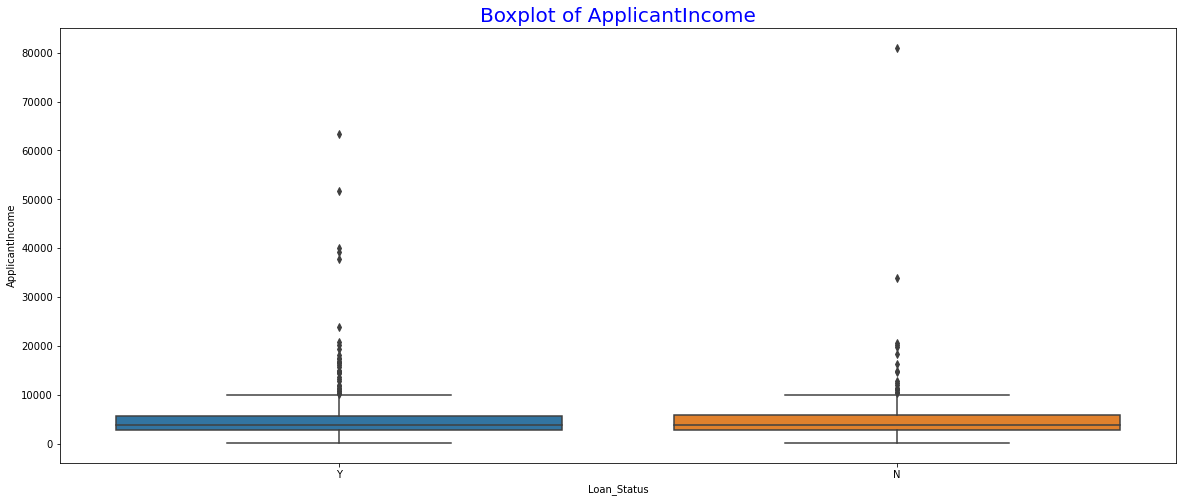

In [31]:
plt.figure(figsize = (20, 8))
sns.boxplot(y = 'ApplicantIncome', data = train, x = 'Loan_Status')
plt.title('Boxplot of ApplicantIncome', loc = 'center', fontdict = {'color' : 'blue',
                                                                    'fontsize' : 20})
plt.show()

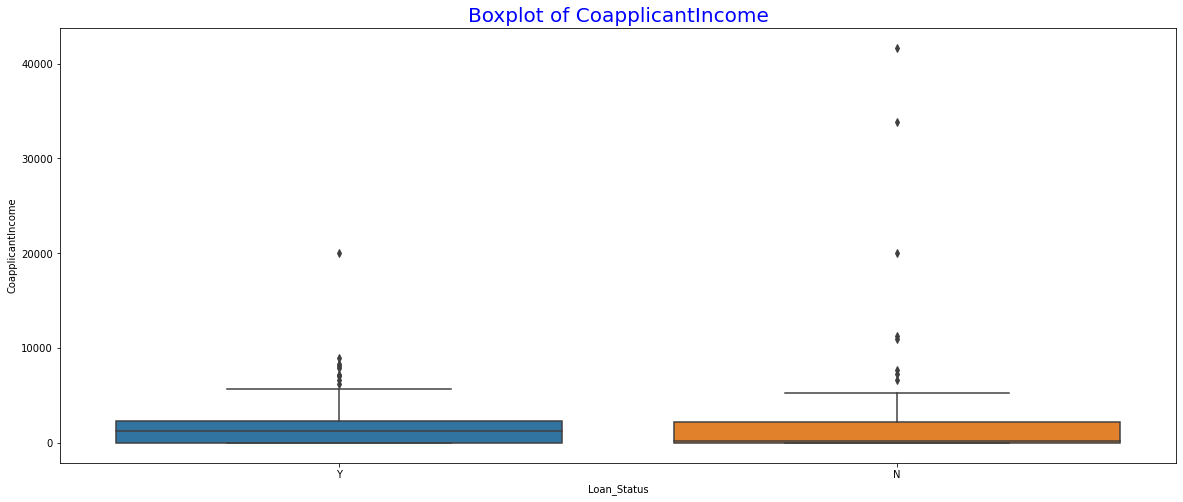

In [32]:
plt.figure(figsize = (20, 8))
sns.boxplot(y = 'CoapplicantIncome', data = train, x = 'Loan_Status')
plt.title('Boxplot of CoapplicantIncome', loc = 'center', fontdict = {'color' : 'blue',
                                                                      'fontsize' : 20})
plt.show()

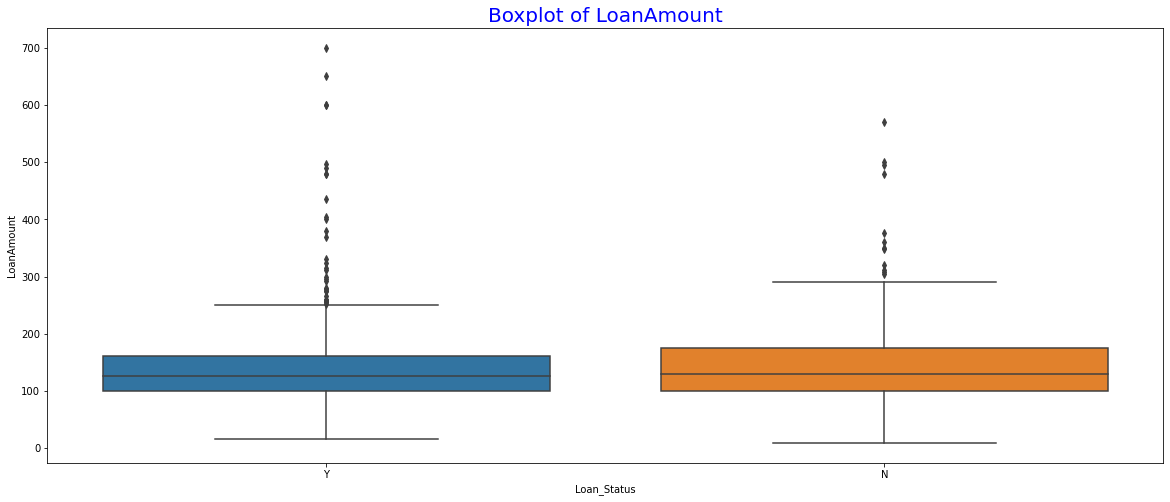

In [33]:
plt.figure(figsize = (20, 8))
sns.boxplot(y = 'LoanAmount', data = train, x = 'Loan_Status')
plt.title('Boxplot of LoanAmount', loc = 'center', fontdict = {'color' : 'blue',
                                                               'fontsize' : 20})
plt.show()

In [34]:
# Concatinating both train and test datasets for data imputation and manipulatuion

train['source'] = 'train'
test['source'] = 'test'

data = pd.concat([train, test], axis = 0)
data.shape

(981, 14)

In [35]:
data.head()     # Total Dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train


In [36]:
data.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [37]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
source                object
dtype: object

In [38]:
data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,981,981,LP001703,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,957,2,Male,775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,978,2,Yes,631,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,956,4,0,545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,981,2,Graduate,763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,926,2,No,807,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,981,NaN,NaN,NaN,5179.8,5695.1,0,2875,3800,5516,81000
CoapplicantIncome,981,NaN,NaN,NaN,1601.92,2718.77,0,0,1110,2365,41667
LoanAmount,954,NaN,NaN,NaN,142.512,77.4217,9,100,126,162,700
Loan_Amount_Term,961,NaN,NaN,NaN,342.202,65.1006,6,360,360,360,480


In [39]:
cat_var = data.drop(['Loan_ID', 'Loan_Status','source'], axis = 1).select_dtypes('object')

for i in cat_var:
    print('*************************************')
    print(f'Column Name :- {i}')
    print(data[i].value_counts())

*************************************
Column Name :- Gender
Male      775
Female    182
Name: Gender, dtype: int64
*************************************
Column Name :- Married
Yes    631
No     347
Name: Married, dtype: int64
*************************************
Column Name :- Dependents
0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64
*************************************
Column Name :- Education
Graduate        763
Not Graduate    218
Name: Education, dtype: int64
*************************************
Column Name :- Self_Employed
No     807
Yes    119
Name: Self_Employed, dtype: int64
*************************************
Column Name :- Property_Area
Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64


In [40]:
# Imputing Missing Values

data['Gender'] = data['Gender'].fillna(value = data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(value = data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(value = data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(value = data['Self_Employed'].mode()[0])
data['LoanAmount'] = data['LoanAmount'].fillna(value = int(data['LoanAmount'].mean()))
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(value = data['Loan_Amount_Term'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(value = data['Credit_History'].mode()[0])

## Feature Engineering and Feature Transformation

In [41]:
# Changing Datatypes of Some Columns

data['Loan_Amount_Term'] = data['Loan_Amount_Term'].astype('int')
data['Credit_History'] = data['Credit_History'].astype('int')

In [42]:
for i in cat_var:
    x = (data.groupby(i)[i].agg('count')) / len(data)
    data[i+'LikeHood'] = data[i].apply(lambda y : x[y])
    data.drop(i, axis = 1, inplace = True)

In [43]:
# Changing Object or String Datatypes to Numerical Datatypes

data['Loan_Status'] = data['Loan_Status'].map({'Y' : 1,
                                               'N' : 0})

In [44]:
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['TotalLoanAmount'] = data['LoanAmount']*1000
data['PercentageOfLoan'] = (data['TotalLoanAmount'] / data['TotalIncome']) * 100
data['LoanAmountTermYears'] = data['Loan_Amount_Term'] / 12
data['AmountOfLoanPaidPerYear'] = data['TotalLoanAmount'] / data['LoanAmountTermYears']
data['PercentageOfLoanPaidPerYeartoTotalIncomePerYear'] = (data['AmountOfLoanPaidPerYear'] / data['TotalIncome'])*100

In [45]:
data = data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)

## Final Data Set

In [46]:
data.head()

,Loan_ID,Credit_History,Loan_Status,source,GenderLikeHood,MarriedLikeHood,DependentsLikeHood,EducationLikeHood,Self_EmployedLikeHood,Property_AreaLikeHood,TotalIncome,TotalLoanAmount,PercentageOfLoan,LoanAmountTermYears,AmountOfLoanPaidPerYear,PercentageOfLoanPaidPerYeartoTotalIncomePerYear
0,LP001002,1,1.0,train,0.814475,0.353721,0.581040,0.777778,0.878695,0.348624,5849.0,142000.0,2427.765430,30.0,4733.333333,80.925514
1,LP001003,1,0.0,train,0.814475,0.646279,0.163099,0.777778,0.878695,0.295617,6091.0,128000.0,2101.461172,30.0,4266.666667,70.048706
2,LP001005,1,1.0,train,0.814475,0.646279,0.581040,0.777778,0.121305,0.348624,3000.0,66000.0,2200.000000,30.0,2200.000000,73.333333
3,LP001006,1,1.0,train,0.814475,0.646279,0.581040,0.222222,0.878695,0.348624,4941.0,120000.0,2428.658166,30.0,4000.000000,80.955272
4,LP001008,1,1.0,train,0.814475,0.353721,0.581040,0.777778,0.878695,0.348624,6000.0,141000.0,2350.000000,30.0,4700.000000,78.333333


In [47]:
data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,981,981,LP001703,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit_History,981,NaN,NaN,NaN,0.849134,0.358101,0,1,1,1,1
Loan_Status,614,NaN,NaN,NaN,0.687296,0.463973,0,0,1,1,1
source,981,2,train,614,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GenderLikeHood,981,NaN,NaN,NaN,0.697789,0.244612,0.185525,0.814475,0.814475,0.814475,0.814475
MarriedLikeHood,981,NaN,NaN,NaN,0.542795,0.139951,0.353721,0.353721,0.646279,0.646279,0.646279
DependentsLikeHood,981,NaN,NaN,NaN,0.399415,0.214834,0.0927625,0.163099,0.58104,0.58104,0.58104
EducationLikeHood,981,NaN,NaN,NaN,0.654321,0.231084,0.222222,0.777778,0.777778,0.777778,0.777778
Self_EmployedLikeHood,981,NaN,NaN,NaN,0.78682,0.2474,0.121305,0.878695,0.878695,0.878695,0.878695
Property_AreaLikeHood,981,NaN,NaN,NaN,0.335493,0.0260189,0.295617,0.295617,0.348624,0.355759,0.355759


* Let's Visualise the new variables.

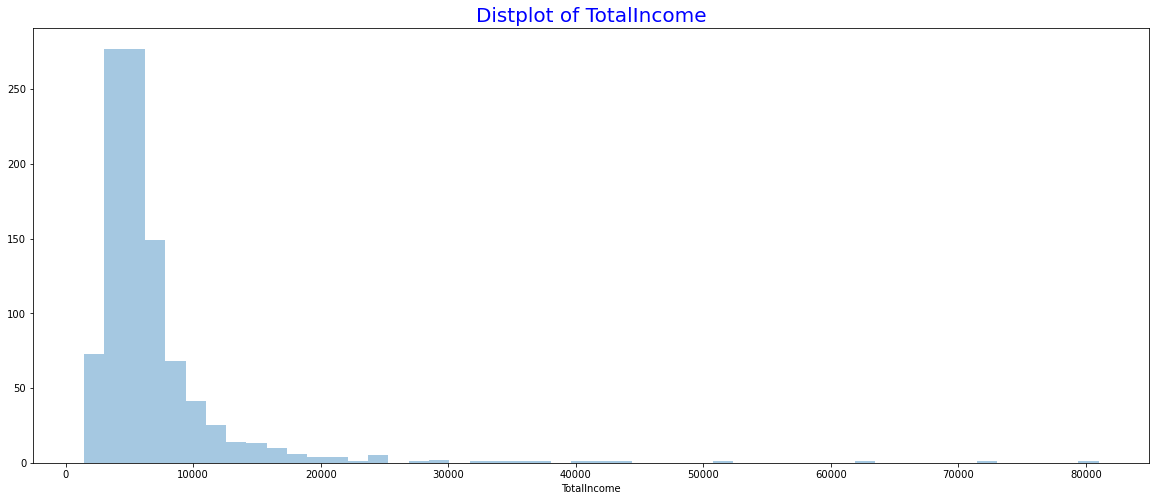

In [48]:
plt.figure(figsize = (20, 8))
sns.distplot(np.power(data['TotalIncome'], 1), kde = False)
plt.title('Distplot of TotalIncome', loc = 'center', fontdict = {'color' : 'blue',
                                                                'fontsize' : 20})
plt.show()

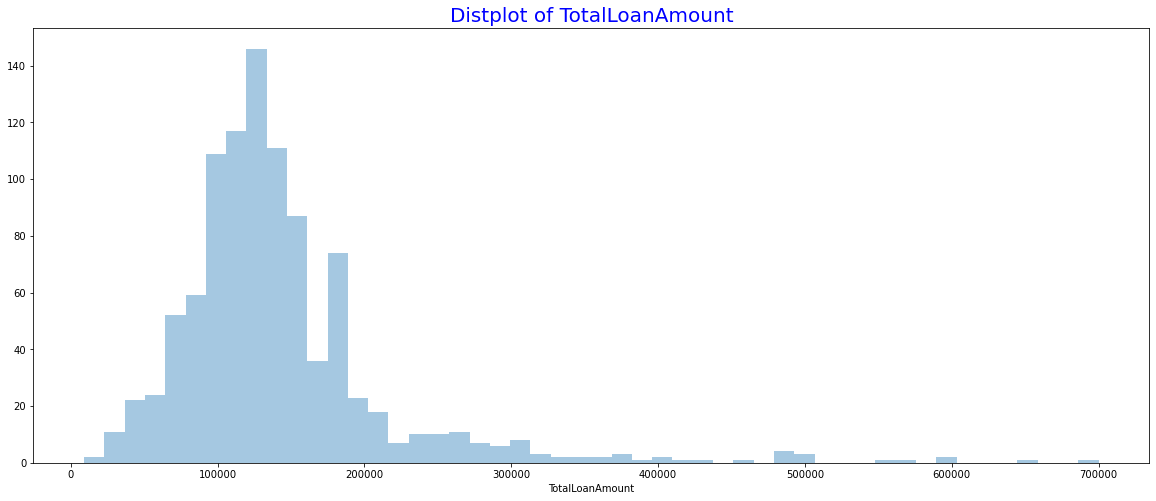

In [49]:
plt.figure(figsize = (20, 8))
sns.distplot(np.power(data['TotalLoanAmount'], 1), kde = False)
plt.title('Distplot of TotalLoanAmount', loc = 'center', fontdict = {'color' : 'blue',
                                                                'fontsize' : 20})
plt.show()

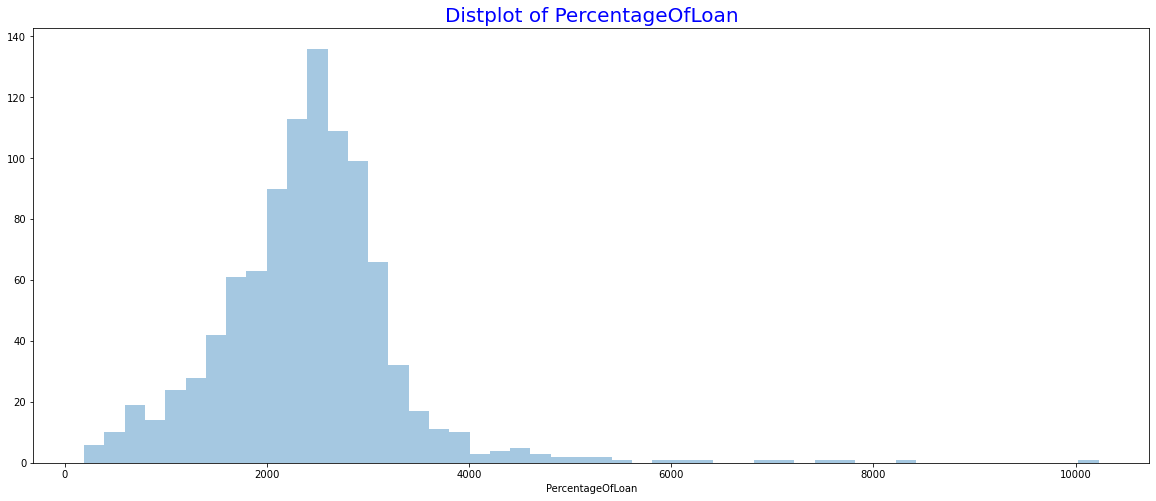

In [50]:
plt.figure(figsize = (20, 8))
sns.distplot(np.power(data['PercentageOfLoan'], 1), kde = False)
plt.title('Distplot of PercentageOfLoan', loc = 'center', fontdict = {'color' : 'blue',
                                                                'fontsize' : 20})
plt.show()

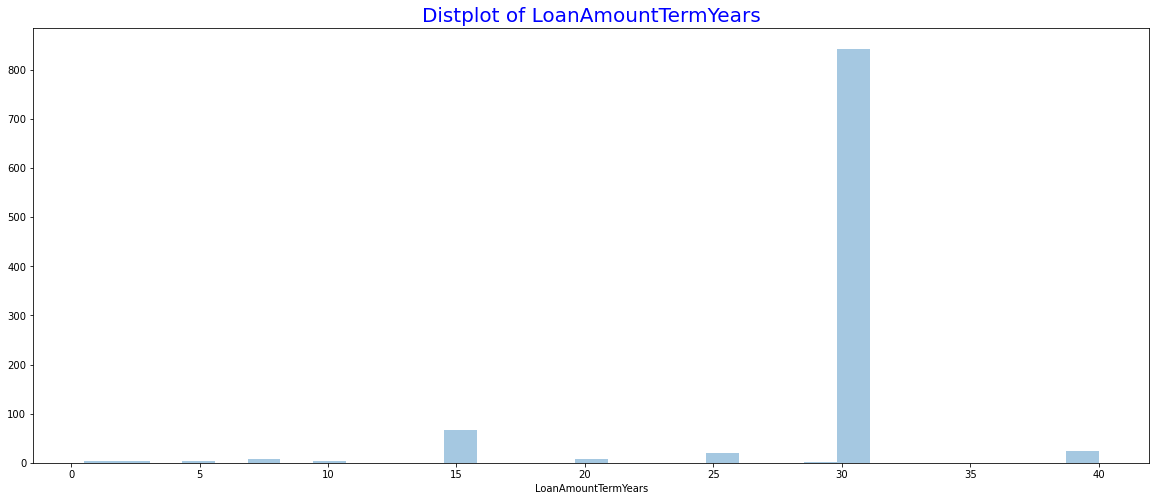

In [51]:
plt.figure(figsize = (20, 8))
sns.distplot(np.power(data['LoanAmountTermYears'], 1), kde = False)
plt.title('Distplot of LoanAmountTermYears', loc = 'center', fontdict = {'color' : 'blue',
                                                                'fontsize' : 20})
plt.show()

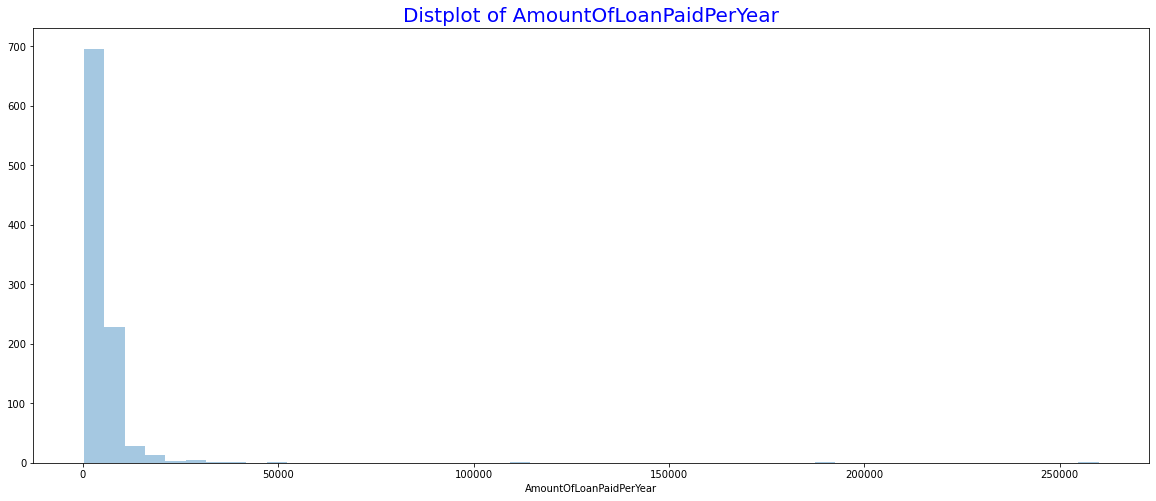

In [52]:
plt.figure(figsize = (20, 8))
sns.distplot(np.power(data['AmountOfLoanPaidPerYear'], 1), kde = False)
plt.title('Distplot of AmountOfLoanPaidPerYear', loc = 'center', fontdict = {'color' : 'blue',
                                                                'fontsize' : 20})
plt.show()

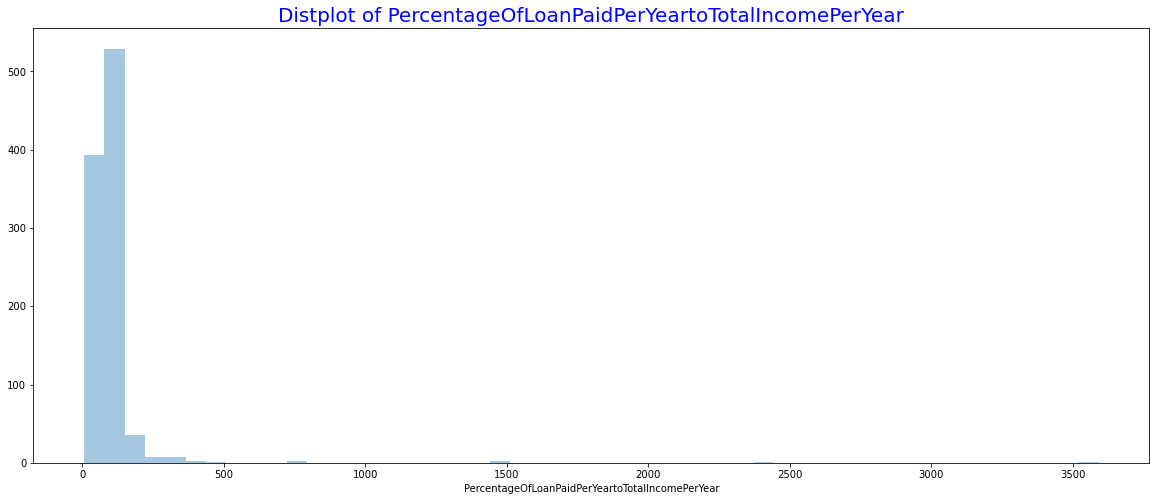

In [53]:
plt.figure(figsize = (20, 8))
sns.distplot(np.power(data['PercentageOfLoanPaidPerYeartoTotalIncomePerYear'], 1), kde = False)
plt.title('Distplot of PercentageOfLoanPaidPerYeartoTotalIncomePerYear', loc = 'center', fontdict = {'color' : 'blue',
                                                                'fontsize' : 20})
plt.show()

* Almost every graph is skewed, so it is required to transform variables.

In [54]:
data['TotalIncome'] = np.power(data['TotalIncome'], 1/4)
data['TotalLoanAmount'] = np.power(data['TotalLoanAmount'], 1/4)
data['PercentageOfLoan'] = np.power(data['PercentageOfLoan'], 1/4)
data['AmountOfLoanPaidPerYear'] = np.power(data['AmountOfLoanPaidPerYear'], 1/4)
data['PercentageOfLoanPaidPerYeartoTotalIncomePerYear'] = np.power(data['PercentageOfLoanPaidPerYeartoTotalIncomePerYear'], 1/4)

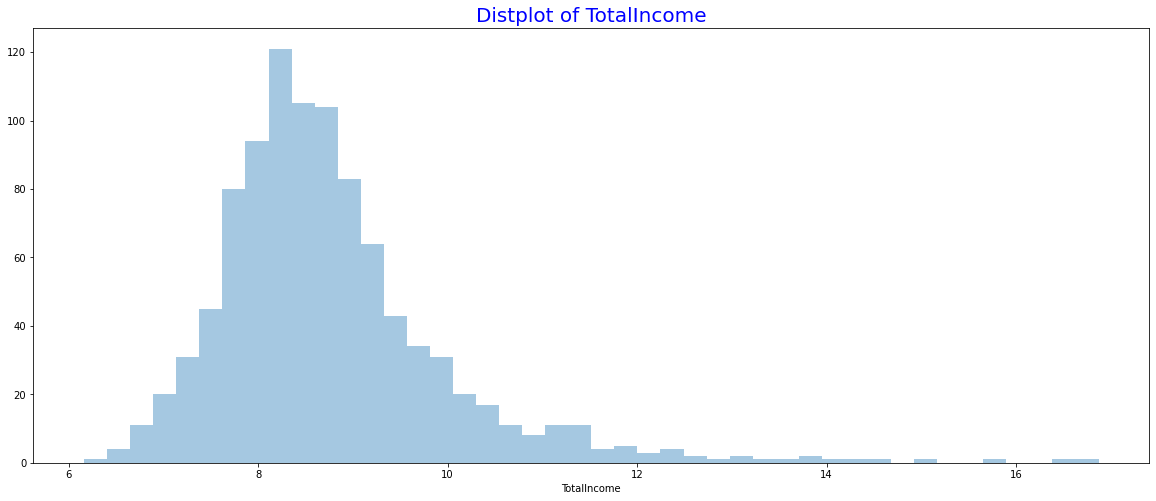

In [55]:
plt.figure(figsize = (20, 8))
sns.distplot(data['TotalIncome'], kde = False)
plt.title('Distplot of TotalIncome', loc = 'center', fontdict = {'color' : 'blue',
                                                                 'fontsize' : 20})
plt.show()

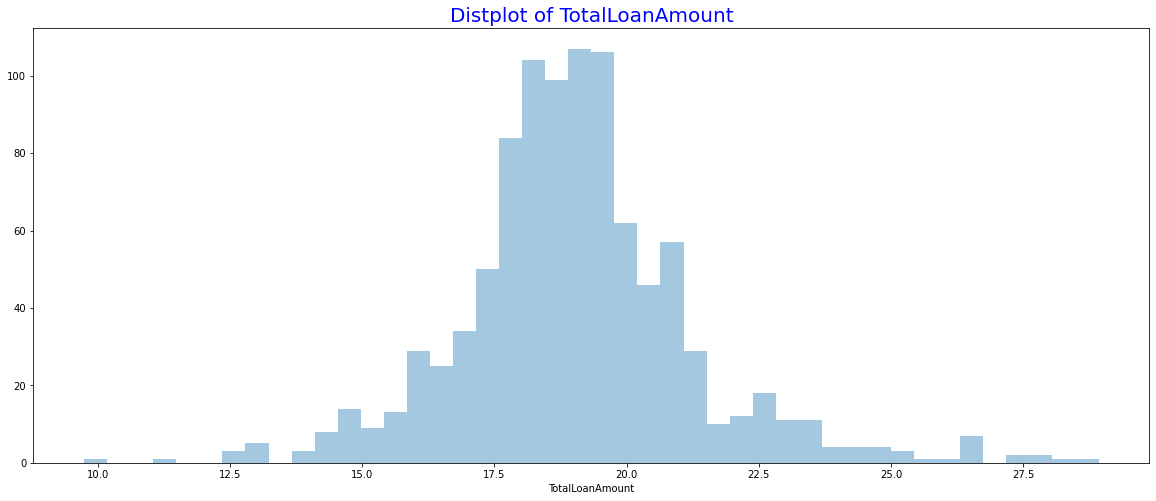

In [56]:
plt.figure(figsize = (20, 8))
sns.distplot(data['TotalLoanAmount'], kde = False)
plt.title('Distplot of TotalLoanAmount', loc = 'center', fontdict = {'color' : 'blue',
                                                                     'fontsize' : 20})
plt.show()

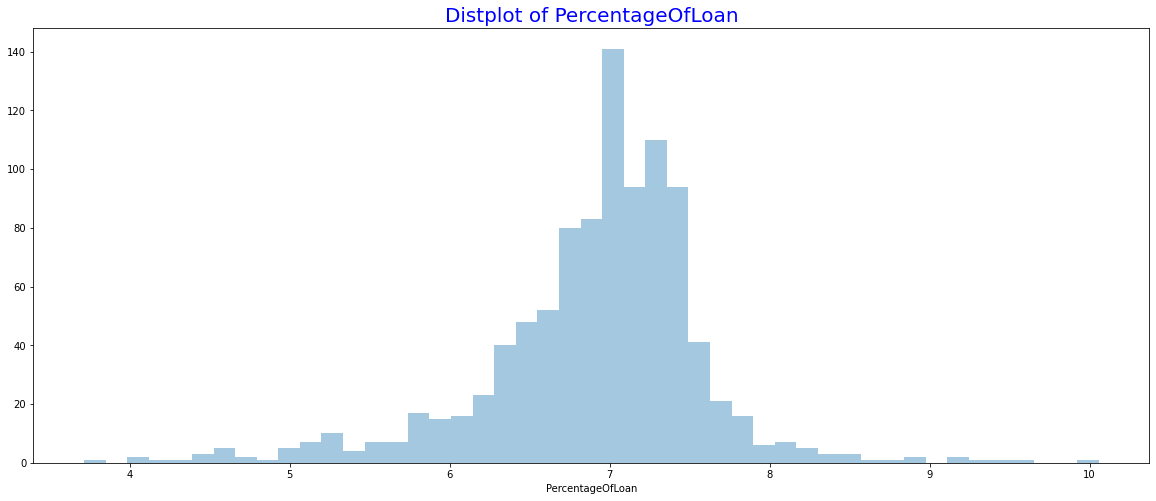

In [57]:
plt.figure(figsize = (20, 8))
sns.distplot(data['PercentageOfLoan'], kde = False)
plt.title('Distplot of PercentageOfLoan', loc = 'center', fontdict = {'color' : 'blue',
                                                                      'fontsize' : 20})
plt.show()

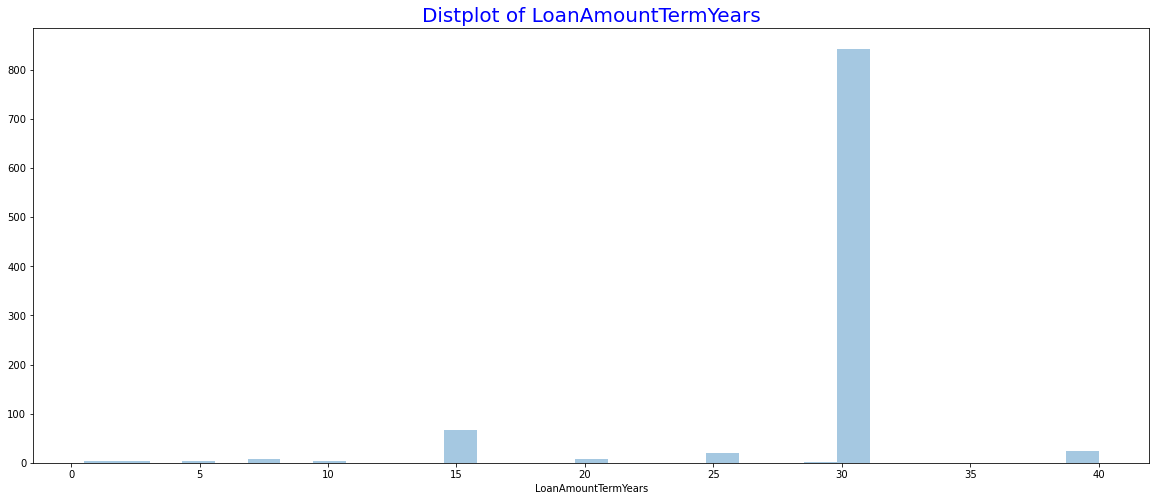

In [58]:
plt.figure(figsize = (20, 8))
sns.distplot(data['LoanAmountTermYears'], kde = False)
plt.title('Distplot of LoanAmountTermYears', loc = 'center', fontdict = {'color' : 'blue',
                                                                         'fontsize' : 20})
plt.show()

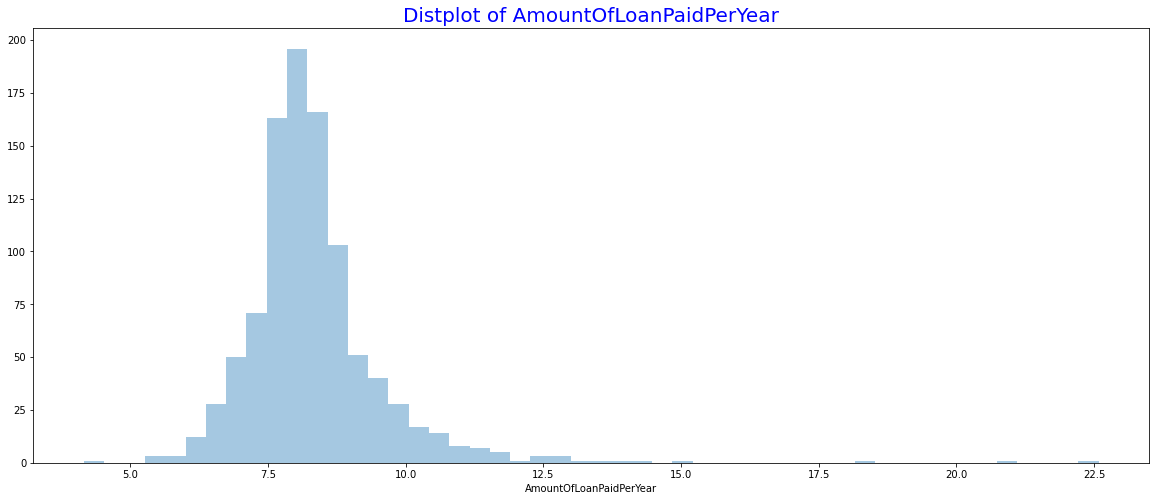

In [59]:
plt.figure(figsize = (20, 8))
sns.distplot(data['AmountOfLoanPaidPerYear'], kde = False)
plt.title('Distplot of AmountOfLoanPaidPerYear', loc = 'center', fontdict = {'color' : 'blue',
                                                                             'fontsize' : 20})
plt.show()

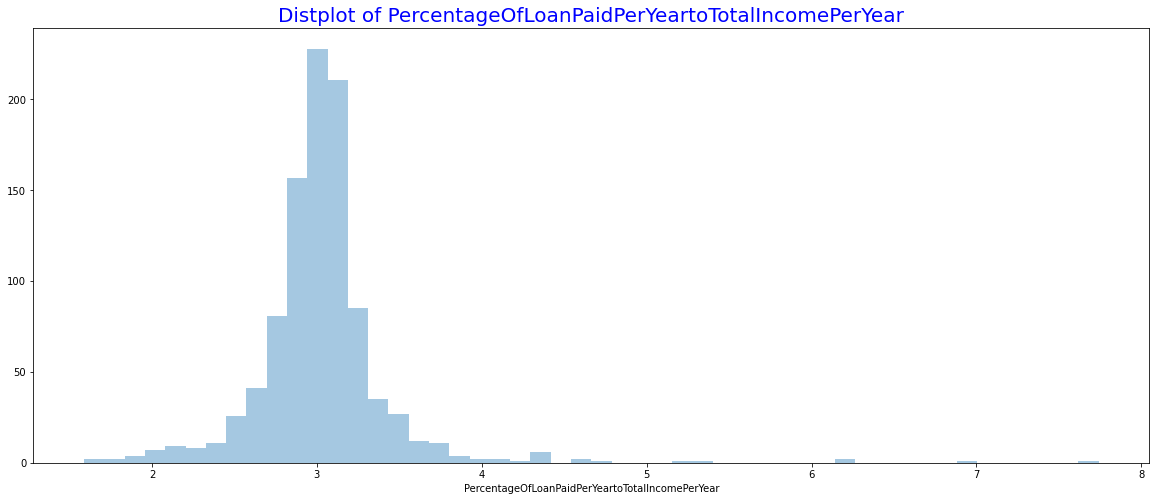

In [60]:
plt.figure(figsize = (20, 8))
sns.distplot(data['PercentageOfLoanPaidPerYeartoTotalIncomePerYear'], kde = False)
plt.title('Distplot of PercentageOfLoanPaidPerYeartoTotalIncomePerYear', loc = 'center', fontdict = {'color' : 'blue',
                                                                                                     'fontsize' : 20})
plt.show()

* Almost for every graph the skewedness is decreased.

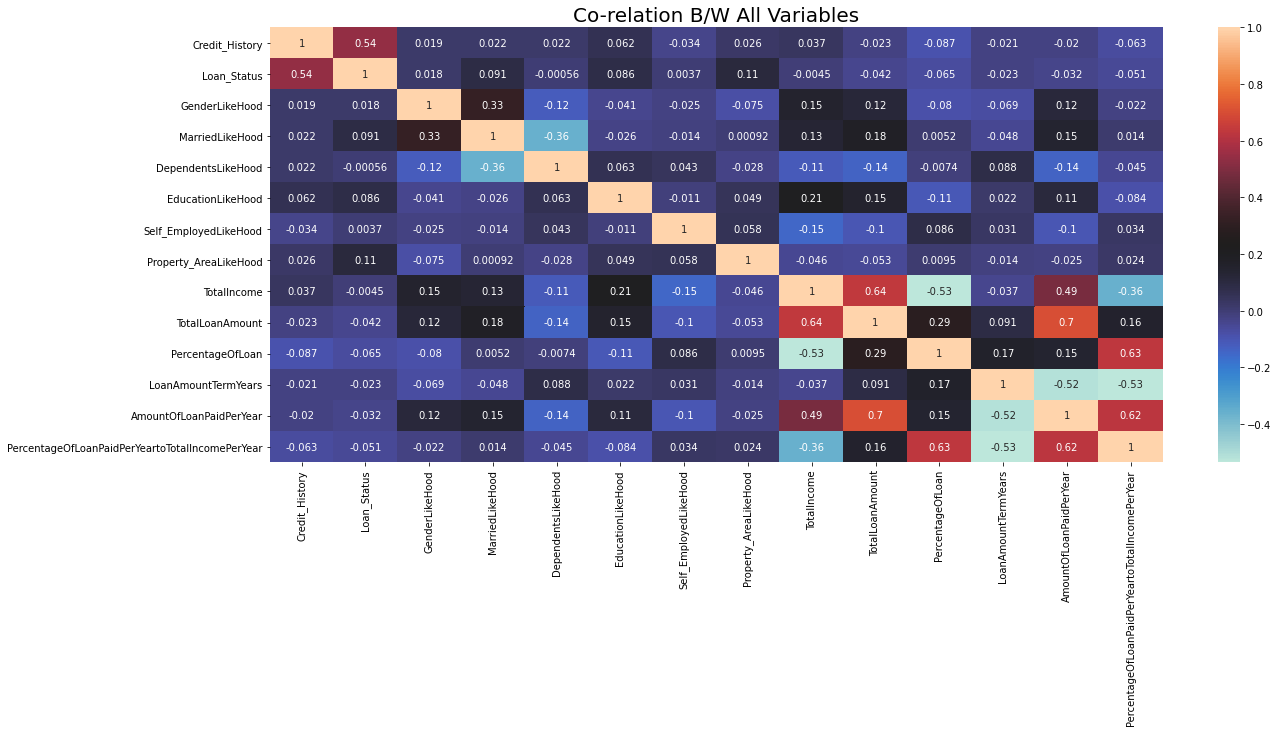

In [61]:
plt.figure(figsize = (20, 8))
sns.heatmap(data.corr(), annot = True, cmap = 'icefire')
plt.title('Co-relation B/W All Variables', fontdict = {'fontsize' : 20})
plt.show()

In [62]:
train = data[data['source'] == 'train']
test = data[data['source'] == 'test']

train.shape, test.shape

((614, 16), (367, 16))

In [63]:
test = test.drop(['source', 'Loan_Status'], axis = 1)

features = train.drop(['Loan_ID', 'Loan_Status', 'source'], axis = 1).columns
target = 'Loan_Status'

x = train[features].values
y = train[target].values.reshape(len(train), -1)

x.shape, y.shape

((614, 13), (614, 1))

In [64]:
scaler = RobustScaler()
scaled_x = scaler.fit_transform(x)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, stratify = y, test_size = 0.2, random_state = 17)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((491, 13), (123, 13), (491, 1), (123, 1))

In [66]:
lr = models.logistic_regression(x_train, y_train)
pred_lr = lr.predict(x_test)

print('\n')
print("Classification Report :-")
print(classification_report(pred_lr, y_test))

Training Completed .....


Classification Report :-
              precision    recall  f1-score   support

         0.0       0.45      0.89      0.60        19
         1.0       0.98      0.80      0.88       104

    accuracy                           0.81       123
   macro avg       0.71      0.85      0.74       123
weighted avg       0.89      0.81      0.83       123



In [67]:
accuracy = []
depth = []
features = []
nodes = []

for i in range(2, 15):
    for j in range(3, 13):
        for k in range(4, 30):
            dtree = models.d_tree_classification(x_train, y_train, max_depth = i, max_features = j, max_leaf_nodes = k)
            accuracy.append(accuracy_score(dtree.predict(x_test), y_test))
            depth.append(i)
            features.append(j)
            nodes.append(k)

In [68]:
opt = accuracy.index(max(accuracy))

print(f"Max Accuracy Attained :- {accuracy[opt]}")
print(f"Optimum Depth :- {depth[opt]}")
print(f"Optimum features :- {features[opt]}")
print(f"Optimum No. of Nodes :- {nodes[opt]}")

Max Accuracy Attained :- 0.8130081300813008
Optimum Depth :- 3
Optimum features :- 10
Optimum No. of Nodes :- 4


In [69]:
dtree = models.d_tree_classification(x_train, y_train, max_depth = 3, max_features = 11, max_leaf_nodes = 4)
pred_dtree = dtree.predict(x_test)

print("Classification Report :-")
print(classification_report(pred_dtree, y_test))

Classification Report :-
              precision    recall  f1-score   support

         0.0       0.50      0.79      0.61        24
         1.0       0.94      0.81      0.87        99

    accuracy                           0.80       123
   macro avg       0.72      0.80      0.74       123
weighted avg       0.86      0.80      0.82       123



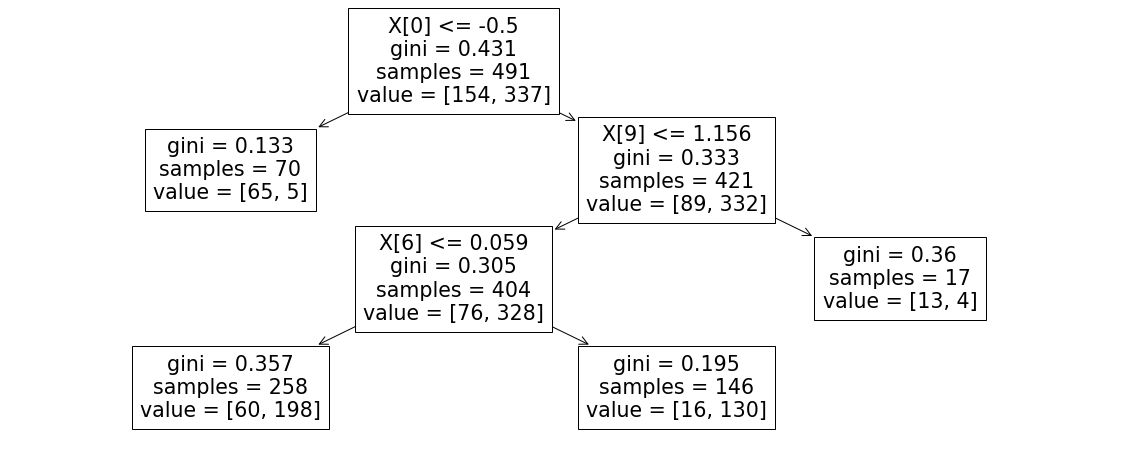

In [70]:
plt.figure(figsize = (20, 8))
tree.plot_tree(dtree)
plt.show()

In [71]:
rf = models.random_forest_classification(x_train, y_train,n_estimators = 5, max_depth = 3, max_features = 11, max_leaf_nodes = 8)
pred_rf = rf.predict(x_test)

print("Classification Report :-")
print(classification_report(pred_rf, y_test))

Training Completed .....
Classification Report :-
              precision    recall  f1-score   support

         0.0       0.47      0.75      0.58        24
         1.0       0.93      0.80      0.86        99

    accuracy                           0.79       123
   macro avg       0.70      0.77      0.72       123
weighted avg       0.84      0.79      0.80       123



In [72]:
xgb = models.xgboost_classification(x_train, y_train, n_estimators = 100, max_depth = 3, learning_rate = 0.1)
pred_xgb = xgb.predict(x_test)

print("Classification Report :-")
print(classification_report(pred_xgb, y_test))

Training Completed .....
Classification Report :-
              precision    recall  f1-score   support

         0.0       0.47      0.78      0.59        23
         1.0       0.94      0.80      0.86       100

    accuracy                           0.80       123
   macro avg       0.71      0.79      0.73       123
weighted avg       0.85      0.80      0.81       123



In [73]:
cat = models.catboost_classification(x_train, y_train, max_depth = 3)
pred_cat = cat.predict(x_test)

print("Classification Report :-")
print(classification_report(pred_cat, y_test))

0:	learn: 0.6588821	total: 147ms	remaining: 14.6s
1:	learn: 0.6308842	total: 149ms	remaining: 7.28s
2:	learn: 0.6075883	total: 150ms	remaining: 4.84s
3:	learn: 0.5867515	total: 151ms	remaining: 3.61s
4:	learn: 0.5675560	total: 151ms	remaining: 2.88s
5:	learn: 0.5532369	total: 152ms	remaining: 2.39s
6:	learn: 0.5388384	total: 153ms	remaining: 2.04s
7:	learn: 0.5251650	total: 154ms	remaining: 1.77s
8:	learn: 0.5155450	total: 155ms	remaining: 1.57s
9:	learn: 0.5076820	total: 156ms	remaining: 1.41s
10:	learn: 0.4995922	total: 157ms	remaining: 1.27s
11:	learn: 0.4921686	total: 158ms	remaining: 1.16s
12:	learn: 0.4851092	total: 159ms	remaining: 1.06s
13:	learn: 0.4803607	total: 161ms	remaining: 989ms
14:	learn: 0.4773413	total: 162ms	remaining: 917ms
15:	learn: 0.4725940	total: 163ms	remaining: 856ms
16:	learn: 0.4715212	total: 164ms	remaining: 800ms
17:	learn: 0.4678841	total: 165ms	remaining: 751ms
18:	learn: 0.4651007	total: 166ms	remaining: 707ms
19:	learn: 0.4622526	total: 167ms	remaini

In [74]:
lgbm = models.lightgbm_classification(x_train, y_train, max_depth = 3, num_leaves = 4, learning_rate = 0.1, n_estimators = 100,
                                      colsample_bytree = 0.9)
pred_lgbm = lgbm.predict(x_test)

print("Classification Report :-")
print(classification_report(pred_lgbm, y_test))

Training Completed .....
Classification Report :-
              precision    recall  f1-score   support

         0.0       0.47      0.82      0.60        22
         1.0       0.95      0.80      0.87       101

    accuracy                           0.80       123
   macro avg       0.71      0.81      0.74       123
weighted avg       0.87      0.80      0.82       123



In [75]:
x = mode(np.array([pred_dtree, pred_lgbm, pred_rf]), axis = 0)
x = np.array(x.mode).reshape((123,))

print("Classification Report :-")
print(classification_report(x, y_test))

Classification Report :-
              precision    recall  f1-score   support

         0.0       0.50      0.79      0.61        24
         1.0       0.94      0.81      0.87        99

    accuracy                           0.80       123
   macro avg       0.72      0.80      0.74       123
weighted avg       0.86      0.80      0.82       123



* **After trying different combinations, random forest and lightgbm models ensemble gave good results as compared to others.**

In [76]:
# Scaling Test Data

scaled_test = scaler.transform(test.drop('Loan_ID', axis = 1).values)

## **Final Models**

In [77]:
dtree = models.d_tree_classification(scaled_x, y, max_depth = 3, max_features = 11, max_leaf_nodes = 4)
pred_dtree = dtree.predict(scaled_test)

In [78]:
final_rf = models.random_forest_classification(scaled_x, y,n_estimators = 5, max_depth = 3, max_features = 11, max_leaf_nodes = 8)
pred_final_rf = final_rf.predict(scaled_test)

Training Completed .....


In [79]:
final_lgbm = models.lightgbm_classification(scaled_x, y, max_depth = 3, num_leaves = 4, learning_rate = 0.1, n_estimators = 100,
                                            colsample_bytree = 0.9)
pred_final_lgbm = final_lgbm.predict(scaled_test)

Training Completed .....


In [80]:
final_lg = models.logistic_regression(scaled_x, y)
pred_final_lg = final_lg.predict(scaled_test)

final_pred = []
for i in range(len(pred_final_lg)):
    if pred_final_lg[i] == 1:
        final_pred.append("Y")
    else:
        final_pred.append("N")
        
pred = pd.DataFrame()
pred['Loan_ID'] = test['Loan_ID'].values
pred['Loan_Status'] = final_pred

pred.to_csv("LogisticRegression.csv", index = False)

Training Completed .....


In [81]:
y = mode(np.array([pred_dtree, pred_final_rf, pred_final_lgbm]), axis = 0)
pred = np.array(y.mode).reshape((len(test),))

final_pred = []
for i in range(len(pred)):
    if pred[i] == 1:
        final_pred.append("Y")
    else:
        final_pred.append("N")

In [82]:
pred = pd.DataFrame()
pred['Loan_ID'] = test['Loan_ID'].values
pred['Loan_Status'] = final_pred

pred.to_csv("Ensemble_1.csv", index = False)

In [83]:
pred_final_dtree_1 = dtree.predict_proba(scaled_test)
pred_final_rf_1 = final_rf.predict_proba(scaled_test)
pred_final_lgbm_1 = final_lgbm.predict_proba(scaled_test)

pred_final_dtree_04 = []
pred_final_rf_04 = []
pred_final_lgbm_04 = []

for i in range(len(test)):
    if pred_final_dtree_1[i][1] > 0.4:
        pred_final_dtree_04.append(1)
    else:
        pred_final_dtree_04.append(0)

for i in range(len(test)):
    if pred_final_rf_1[i][1] > 0.4:
        pred_final_rf_04.append(1)
    else:
        pred_final_rf_04.append(0)
        
for i in range(len(test)):
    if pred_final_lgbm_1[i][1] > 0.4:
        pred_final_lgbm_04.append(1)
    else:
        pred_final_lgbm_04.append(0)
        
y_04 = mode(np.array([pred_final_dtree_04, pred_final_rf_04, pred_final_lgbm_04]), axis = 0)
pred_04 = np.array(y_04.mode).reshape((len(test),))

final_pred_04 = []
for i in range(len(pred_04)):
    if pred_04[i] == 1:
        final_pred_04.append("Y")
    else:
        final_pred_04.append("N")

In [84]:
pred = pd.DataFrame()
pred['Loan_ID'] = test['Loan_ID'].values
pred['Loan_Status'] = final_pred_04

pred.to_csv("Ensemble_1_04.csv", index = False)

In [85]:
pred_final_dtree_06 = []
pred_final_rf_06 = []
pred_final_lgbm_06 = []

for i in range(len(test)):
    if pred_final_dtree_1[i][1] >= 0.6:
        pred_final_dtree_06.append(1)
    else:
        pred_final_dtree_06.append(0)

for i in range(len(test)):
    if pred_final_rf_1[i][1] >= 0.6:
        pred_final_rf_06.append(1)
    else:
        pred_final_rf_06.append(0)
        
for i in range(len(test)):
    if pred_final_lgbm_1[i][1] >= 0.6:
        pred_final_lgbm_06.append(1)
    else:
        pred_final_lgbm_06.append(0)
        
y_06 = mode(np.array([pred_final_dtree_06, pred_final_rf_06, pred_final_lgbm_06]), axis = 0)
pred_06 = np.array(y_06.mode).reshape((len(test),))

final_pred_06 = []
for i in range(len(pred_06)):
    if pred_06[i] == 1:
        final_pred_06.append("Y")
    else:
        final_pred_06.append("N")

In [86]:
pred = pd.DataFrame()
pred['Loan_ID'] = test['Loan_ID'].values
pred['Loan_Status'] = final_pred_06

pred.to_csv("Ensemble_1_06.csv", index = False)

# **Thank You**